# The Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set consists of 28,709 examples and the public test set consists of 3,589 examples.
https://www.kaggle.com/datasets/msambare/fer2013?resource=download

# 2. Initial EDA

### Importing Packages

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import random

In [2]:
# '/Users/ivan.miller/Documents/study/ccny/22Spring_ML/final_project/project_data/test'
train_path = '../../../project_data/train/' # added the last forward slash
test_path = '../../../project_data/test/' # added the last forward slash

# create a dictionary with each emotion encoded as integer
emotions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
# create a dictionary with values as keys to lookup original labels
label_lookup  = {y: x for x, y in emotions.items()} 

#### Exploring the folder contents

In [3]:
# dir_paths = [] # paths to files
# dir_names = [] # flattened images
# files = [] # integers as labels 
# for dir_path, dir_name, file_names in os.walk(train_path, topdown=False):
#     dir_paths.append(dir_path)
#     dir_names.append(dir_name)
#     for filename in file_names:
#         files.append(filename)

In [4]:
# dir_paths

In [5]:
# dir_names

In [6]:
# files[:3]

### Loading the data

In [7]:
def preprocess_arrays(path_to_folder):
    
    '''
    Takes path to a directory with images (train or test) as input
    Returns the following items:
    1. List with paths to image files
    2. Images as numpy arrays (scaled between 0 and 1)
    3. String labels for each image encoded as integers
    '''
    
    files = [] # paths to files
    images = [] # flattened images
    labels = [] # integers as labels 

    for dir_path, dir_name, file_names in os.walk(path_to_folder, topdown=False):
        label = dir_path.replace(path_to_folder,'') # taking a label out of path
        if label != '':
            for filename in file_names:
                file_path = os.path.join(dir_path, filename) # creaitng a full path for file
                img = plt.imread(file_path).flatten() # reading the image from the path as a numpy array
                img = img / 255.0 # Scale pixel values to a range of 0 to 1 

                files.append(file_path) # append full file path
                images.append(img) # append an array to the list
                labels.append(emotions[label]) # append label encoded as an integer

    # saving images and labels as numpy arrays
    images = np.asarray(images) 
    labels = np.asarray(labels)
    
    # print out lengths of each list before returning the results
    print(f'Number of files: {len(files)}, data type: {type(files)}')
    print(f'Number of images: {len(images)}, data type: {type(images)}, shape: {images.shape}')
    print(f'Number of labels: {len(labels)}, data type: {type(labels)}, shape: {labels.shape}')
    return files, images, labels

### Creating the training set

In [8]:
# Creating the lists for files arrays and labels of train data
train_files, train_images, train_labels = preprocess_arrays(train_path)

Number of files: 28709, data type: <class 'list'>
Number of images: 28709, data type: <class 'numpy.ndarray'>, shape: (28709, 2304)
Number of labels: 28709, data type: <class 'numpy.ndarray'>, shape: (28709,)


In [9]:
train_images[2,:2]

array([0.43529412, 0.58039216])

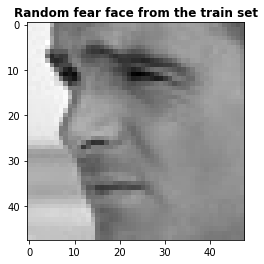

In [10]:
# Sanity check using a random image from the train set
f = random.randint(1,len(train_files))
img = plt.imread(train_files[f])

plt.imshow(img, cmap='gray')
plt.title(f'Random {label_lookup[train_labels[f]]} face from the train set', fontweight = 'bold')
plt.show()

In [18]:
train_images[img_num].shape[0]

2304

In [21]:
np.reshape(train_images[img_num],(train_images[img_num].shape[0],1))

array([[0.14117647],
       [0.12941176],
       [0.13333333],
       ...,
       [0.4       ],
       [0.37647059],
       [0.40784314]])

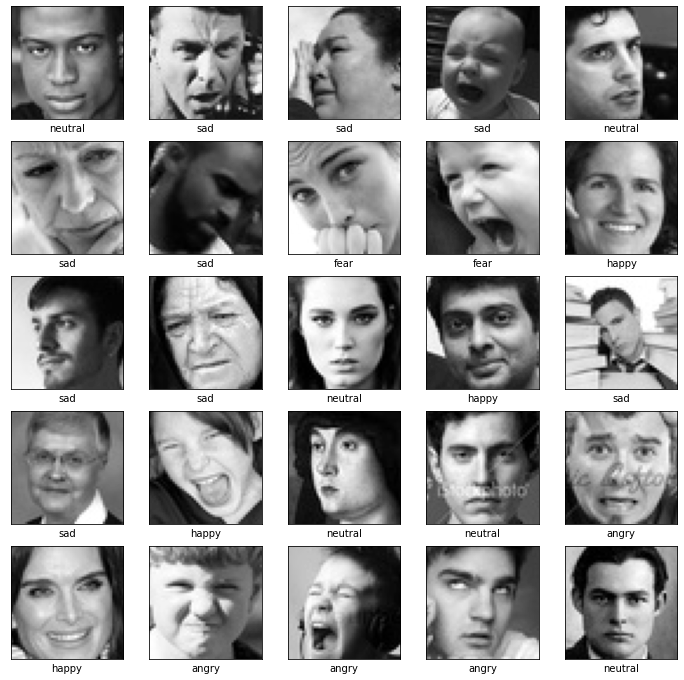

In [25]:
# Checking 25 random images from the train set across all classes
plt.figure(figsize=(12,12))
for ind, img_num in enumerate(np.random.randint(1,len(train_images),size=25)):
    plt.subplot(5,5,ind+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(train_images[img_num],(48,48,1))
               , cmap='gray')
    plt.xlabel(label_lookup[train_labels[img_num]])
plt.show()

### Creating the test set

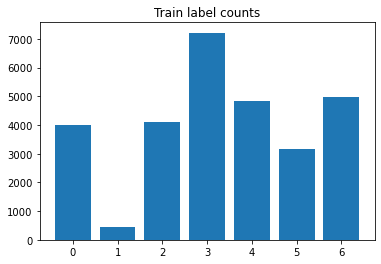

In [27]:
#Count the number of occurences in the train set
label, counts = np.unique(train_labels, return_counts = True)

plt.bar(label, counts )
plt.title('Train label counts')
plt.show()

In [28]:
# Creating the lists for files arrays and labels of train data
test_files, test_images, test_labels = preprocess_arrays(test_path)

Number of files: 7178, data type: <class 'list'>
Number of images: 7178, data type: <class 'numpy.ndarray'>, shape: (7178, 2304)
Number of labels: 7178, data type: <class 'numpy.ndarray'>, shape: (7178,)


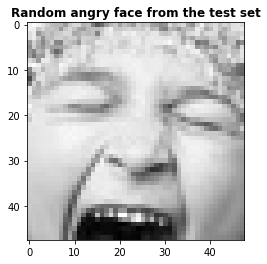

In [29]:
# Sanity check using a random image from the test set
f = random.randint(1,len(test_files))
img = plt.imread(test_files[f])

plt.imshow(img, cmap='gray')
plt.title(f'Random {label_lookup[test_labels[f]]} face from the test set', fontweight = 'bold')
plt.show()

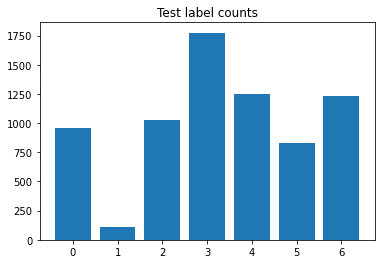

In [30]:
#Count the number of occurences in the test set
label, counts = np.unique(test_labels, return_counts = True)

plt.bar(label, counts )
plt.title('Test label counts')
plt.show()

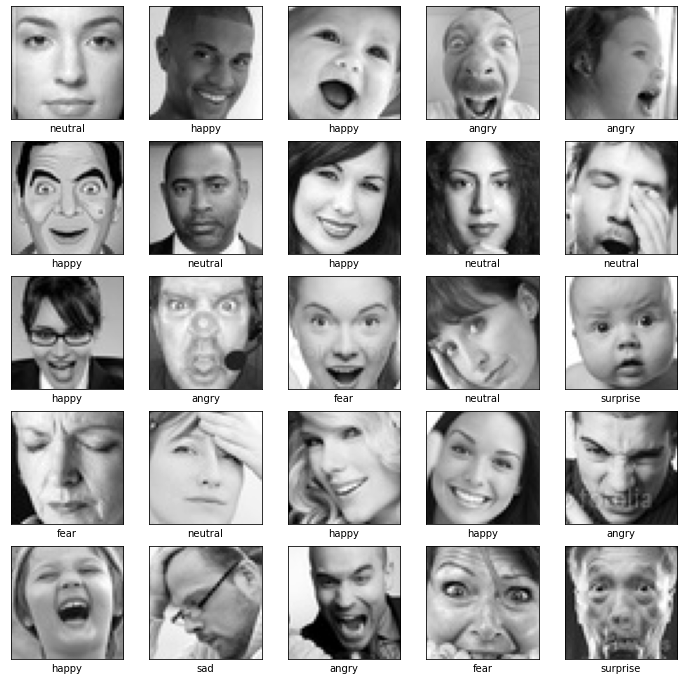

In [32]:
# Checking 25 random images from the train set across all classes
plt.figure(figsize=(12,12))
for ind, img_num in enumerate(np.random.randint(1,len(test_images),size=25)):
    plt.subplot(5,5,ind+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(test_images[img_num],(48,48,1))
               , cmap='gray')
    plt.xlabel(label_lookup[test_labels[img_num]])
plt.show()

## Getting total label count for the dataset

In [39]:
total_labels = np.concatenate((train_labels, test_labels), axis=0)

In [45]:
lbls = [label_lookup[i] for i in total_labels]

In [46]:
df_lbls = pd.DataFrame(lbls)

In [47]:
df_lbls.value_counts()

happy       8989
neutral     6198
sad         6077
fear        5121
angry       4953
surprise    4002
disgust      547
dtype: int64